# Análisis y Predicción de COVID-19

## 1. Importación de librerías

In [1]:
%pip install -r ../requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:

# Cargar los datasets desde la carpeta 'data'
country_wise_df = pd.read_csv('../data/country_wise_latest.csv')
covid_clean_df = pd.read_csv('../data/covid_19_clean_complete.csv')
day_wise_df = pd.read_csv('../data/day_wise.csv')
full_grouped_df = pd.read_csv('../data/full_grouped.csv')
usa_county_df = pd.read_csv('../data/usa_county_wise.csv')
worldometer_df = pd.read_csv('../data/worldometer_data.csv')


In [4]:

# Imprimir los primeros registros de cada dataset para inspección rápida
print("country_wise_df head:")
print(country_wise_df.head())
print("\ncovid_clean_df head:")
print(covid_clean_df.head())
print("\nday_wise_df head:")
print(day_wise_df.head())
print("\nfull_grouped_df head:")
print(full_grouped_df.head())
print("\nusa_county_df head:")
print(usa_county_df.head())
print("\nworldometer_df head:")
print(worldometer_df.head())


country_wise_df head:
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526 

In [5]:

# 3. Análisis Exploratorio de Datos (EDA)

# 3.1 Resumen de datos

print("\ncountry_wise_df Info:")
country_wise_df.info()
print("\ncountry_wise_df Describe:")
print(country_wise_df.describe())

print("\ncovid_clean_df Info:")
covid_clean_df.info()
print("\ncovid_clean_df Describe:")
covid_clean_df.describe()

print("\nday_wise_df Info:")
day_wise_df.info()
print("\nday_wise_df Describe:")
day_wise_df.describe()

print("\nfull_grouped_df Info:")
full_grouped_df.info()
print("\nfull_grouped_df Describe:")
full_grouped_df.describe()

print("\nusa_county_df Info:")
usa_county_df.info()
print("\nusa_county_df Describe:")
usa_county_df.describe()

print("\nworldometer_df Info:")
worldometer_df.info()
print("\nworldometer_df Describe:")
worldometer_df.describe()



country_wise_df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region         

C:\Users\ljant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)



worldometer_df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


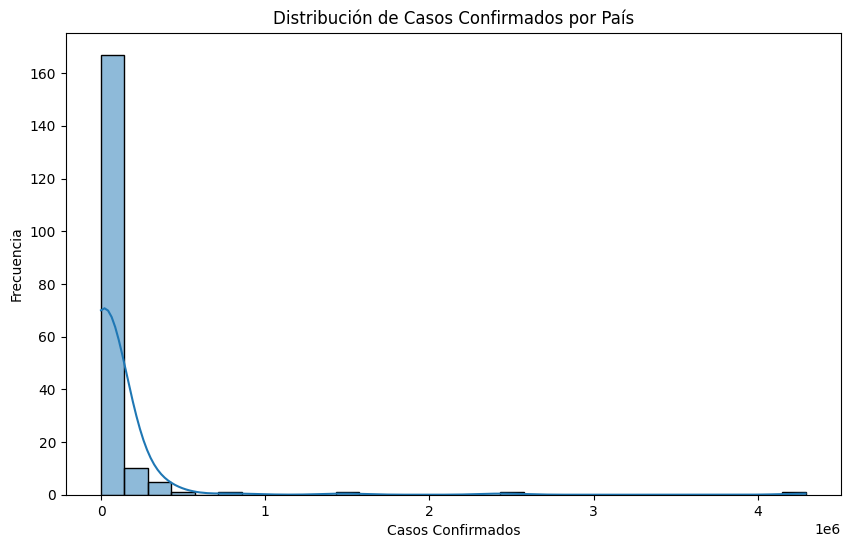

In [6]:

# 3.2 Visualización de distribuciones

# Histograma de casos confirmados (country_wise_df)
plt.figure(figsize=(10, 6))
sns.histplot(country_wise_df['Confirmed'], bins=30, kde=True)
plt.title('Distribución de Casos Confirmados por País')
plt.xlabel('Casos Confirmados')
plt.ylabel('Frecuencia')
plt.show()


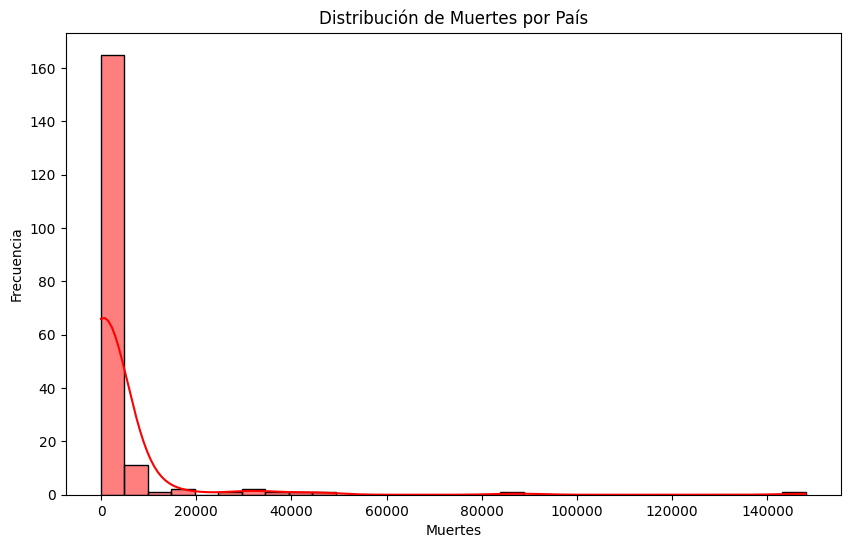

In [7]:
# Histograma de muertes (country_wise_df)
plt.figure(figsize=(10, 6))
sns.histplot(country_wise_df['Deaths'], bins=30, color='red', kde=True)
plt.title('Distribución de Muertes por País')
plt.xlabel('Muertes')
plt.ylabel('Frecuencia')
plt.show()


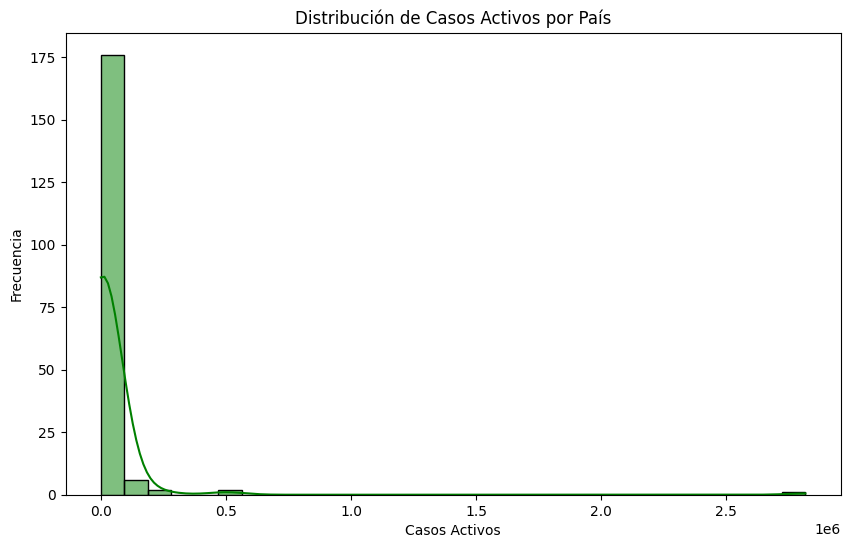

In [8]:

# Histograma de casos activos (country_wise_df)
plt.figure(figsize=(10, 6))
sns.histplot(country_wise_df['Active'], bins=30, color='green', kde=True)
plt.title('Distribución de Casos Activos por País')
plt.xlabel('Casos Activos')
plt.ylabel('Frecuencia')
plt.show()


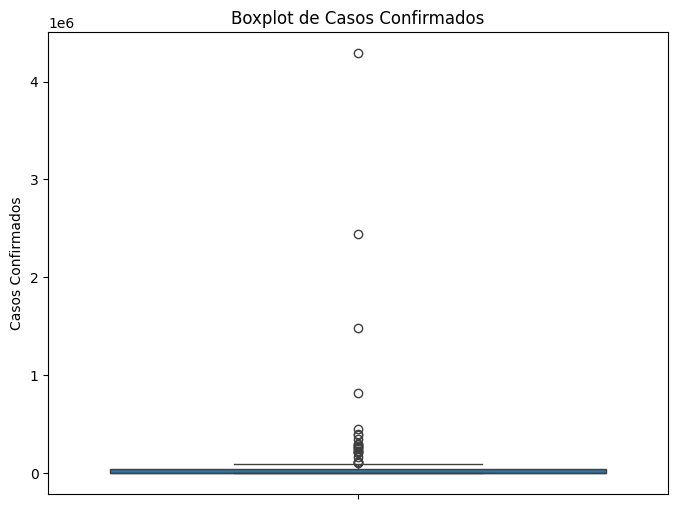

In [9]:

# Boxplot para detectar Outliers (country_wise_df)
plt.figure(figsize=(8, 6))
sns.boxplot(y=country_wise_df['Confirmed'])
plt.title('Boxplot de Casos Confirmados')
plt.ylabel('Casos Confirmados')
plt.show()


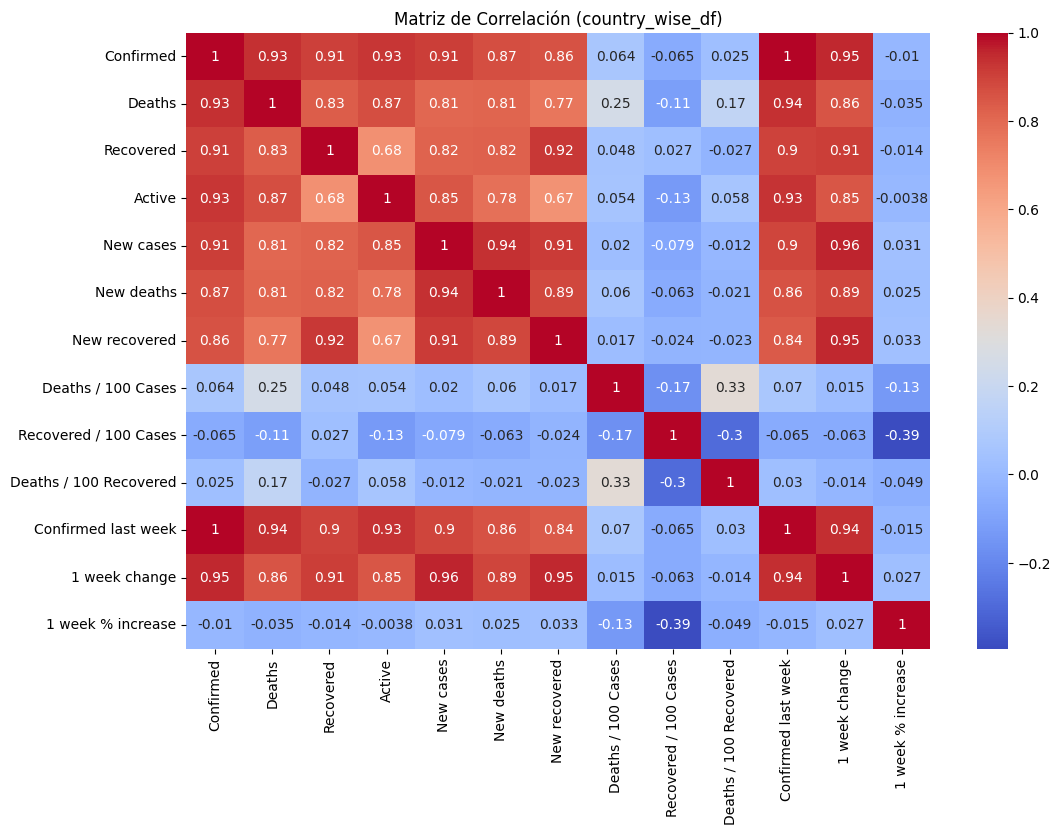

In [10]:

# 3.3 Relación entre variables

# Matriz de correlación (country_wise_df)
numeric_country_wise_df = country_wise_df.select_dtypes(include=np.number)
corr_matrix_country = numeric_country_wise_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_country, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación (country_wise_df)')
plt.show()


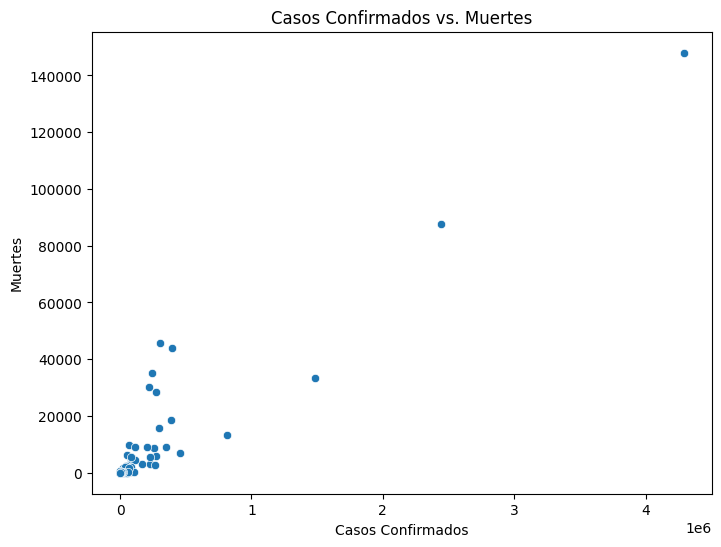

In [11]:

# Scatter plot: Casos Confirmados vs. Muertes (country_wise_df)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Confirmed', y='Deaths', data=country_wise_df)
plt.title('Casos Confirmados vs. Muertes')
plt.xlabel('Casos Confirmados')
plt.ylabel('Muertes')
plt.show()


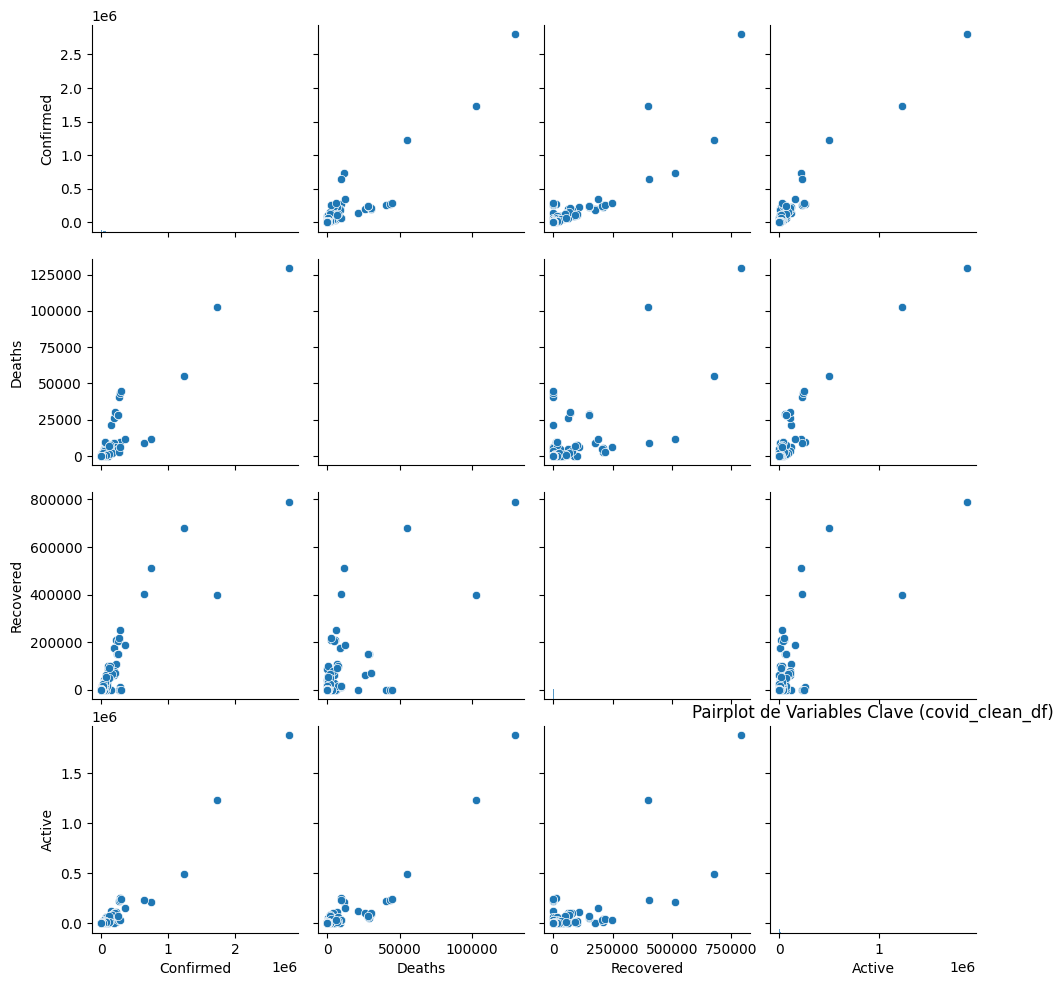

In [12]:

# Pairplot (covid_clean_df) - Muestra las relaciones entre pares de variables
# Limitamos a algunas variables para no sobrecargar
pair_vars = ['Confirmed', 'Deaths', 'Recovered', 'Active']
sns.pairplot(covid_clean_df[pair_vars].sample(1000)) # Usamos sample para acelerar, si es muy grande
plt.title('Pairplot de Variables Clave (covid_clean_df)')
plt.show()


In [13]:

# 4. Preparación de los datos

# Ejemplo: Preparación de datos para un modelo (esto es un EJEMPLO y debe ser adaptado)
# Seleccionamos un dataset para trabajar (ej: country_wise_df)
df = country_wise_df.copy()

# Limpieza básica (esto debe ser revisado y ajustado según el modelo que quieras hacer)
df = df.dropna(subset=['Confirmed', 'Deaths', 'Recovered']) # Eliminar filas con nulos en estas columnas
df = df[df['Confirmed'] > 0] # Eliminar países sin casos confirmados

# Selección de características (EJEMPLO)
features = ['Confirmed', 'Recovered']
target = 'Deaths'

X = df[features]
y = df[target]


In [14]:

# 5. División de los datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:

# 6. Entrenamiento del Modelo

model = LogisticRegression() #  ¡OJO!  Regresión Logística no es apropiada para predecir 'Deaths' (variable numérica).  Esto es solo para mantener la estructura.  Aquí iría el modelo adecuado.
model.fit(X_train, y_train)


C:\Users\ljant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:

# 7. Predicción y evaluación

y_pred = model.predict(X_test)


In [17]:

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matrix}")


Accuracy: 0.0
Confusion Matrix: 
[[0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:

# 8. Conclusiones

print("\nConclusiones del EDA:")
print("- Se observan distribuciones sesgadas a la derecha en los casos confirmados, muertes y casos activos.")
print("- Algunos países tienen un número extremadamente alto de casos, muertes y recuperaciones (outliers).")
print("- Existe una fuerte correlación positiva entre los casos confirmados y las muertes.")
print("- El modelo de Regresión Logística, aunque se usó aquí para mantener la estructura, no es adecuado para predecir una variable continua como 'Deaths'. Se requiere un modelo de regresión (lineal, por ejemplo).")
print("\nRecomendaciones para el futuro:")
print("- Considerar la transformación de los datos (logarítmica) para manejar la asimetría.")
print("- Investigar las razones detrás de los valores atípicos.")
print("- Utilizar un modelo de regresión apropiado para predecir el número de muertes.")


Conclusiones del EDA:
- Se observan distribuciones sesgadas a la derecha en los casos confirmados, muertes y casos activos.
- Algunos países tienen un número extremadamente alto de casos, muertes y recuperaciones (outliers).
- Existe una fuerte correlación positiva entre los casos confirmados y las muertes.
- El modelo de Regresión Logística, aunque se usó aquí para mantener la estructura, no es adecuado para predecir una variable continua como 'Deaths'. Se requiere un modelo de regresión (lineal, por ejemplo).

Recomendaciones para el futuro:
- Considerar la transformación de los datos (logarítmica) para manejar la asimetría.
- Investigar las razones detrás de los valores atípicos.
- Utilizar un modelo de regresión apropiado para predecir el número de muertes.
